# Class 3: Intro to Machine Learning Models
There are many types of machine learning models.  
We learned linear models yesterday and we will learn tree-based models today. <br>
Day 4 will be neural networks.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
# read in our dataset
filename = 'https://raw.githubusercontent.com/sayhellojoel/grade78pythonmath/main/Data/kids%20anonymous%20data.csv'
df = pd.read_csv(filename)

In [24]:
# show the first 5 lines from our dataset
df.head(5)

,Student,Class,AGE (Y/M),Age Decimal,HEIGHT,FOOT LENGTH,INDEX FINGER,# LETTERS,EYE COLOUR
0,1,78,12-11,12.9,174,26,10,5,Blue
1,2,78,13/11,13.9,173,24,9,5,Green
2,3,78,13\6,13.5,173,28,9,5,Brown
3,4,78,13/12,13.9,152,22,8,5,Brown
4,5,78,13/8,13.7,162,23,9,5,Green


## Data Preparation
This data preparation is used for all models below.

In [25]:
# preparing our data for the model
inputs = ['Age Decimal', 'FOOT LENGTH', 'INDEX FINGER'] # these are the variables we want to use as inputs
X = df[inputs]
y = df['HEIGHT']

seed = 1

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## 1) Linear Model (with Multiple Variables)

In [26]:
from sklearn.linear_model import LinearRegression

# Creating the linear regression model
model_linear = LinearRegression()

# Training the model
model_linear.fit(X_train, y_train)

LinearRegression()

In [27]:
# let's inspect the slopes for each variable
# this tells us how much each variable affects height
pd.DataFrame({'Variables': inputs, 'Slopes': model_linear.coef_})

,Variables,Slopes
0,Age Decimal,1.574869
1,FOOT LENGTH,3.139144
2,INDEX FINGER,1.181698


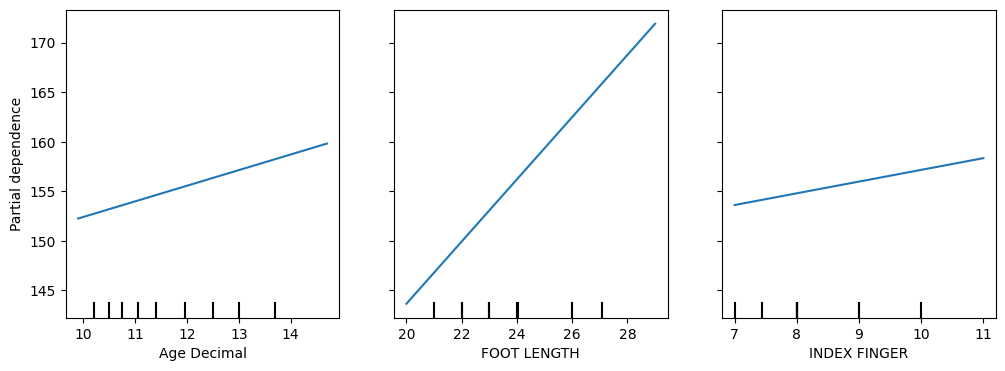

In [28]:
# now let's visualize the slopes for each
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12, 4)) # this allows us to plot all 3 together
PartialDependenceDisplay.from_estimator(model_linear, X_train, features=inputs, ax=ax)
plt.show()

## 2) Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Creating the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=seed, max_depth=2)

# Training the model
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

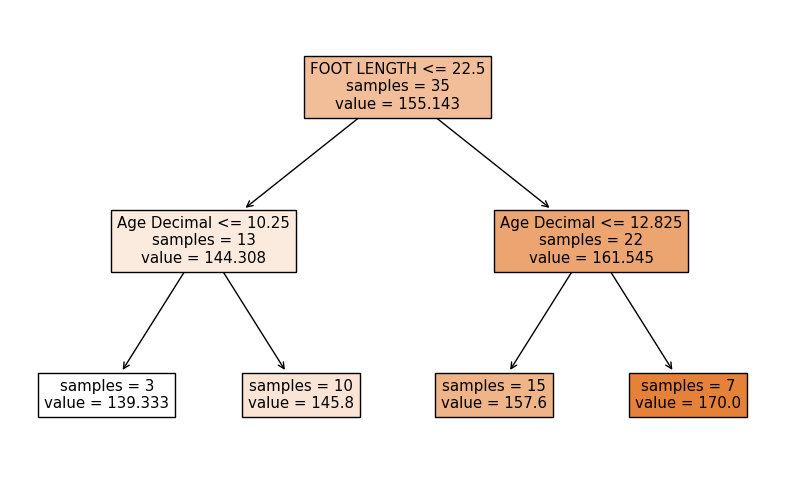

In [30]:
# Visualizing the tree
plt.figure(figsize=(10,6))
plot_tree(model_dt, filled=True, feature_names=inputs, impurity=False)
plt.show()

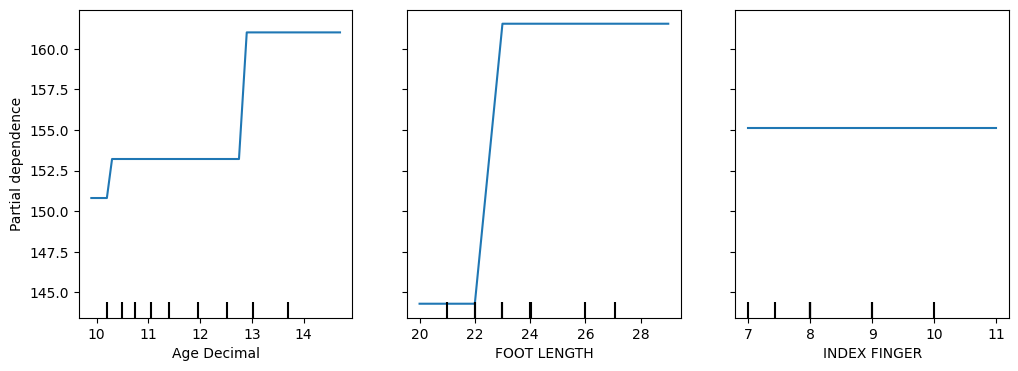

In [31]:
# now let's visualize each variable's affect on height
# Does INDEX FINGER affect anything?
fig, ax = plt.subplots(figsize=(12, 4)) # this allows us to plot all 3 together
PartialDependenceDisplay.from_estimator(model_dt, X_train, features=inputs, ax=ax)
plt.show()

## 3) Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=seed, max_depth=2, n_estimators=100) # makes a forest with 100 trees
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [33]:
pd.DataFrame({'Variables': inputs, 'Importance': model_rf.feature_importances_})

,Variables,Importance
0,Age Decimal,0.160312
1,FOOT LENGTH,0.830821
2,INDEX FINGER,0.008867


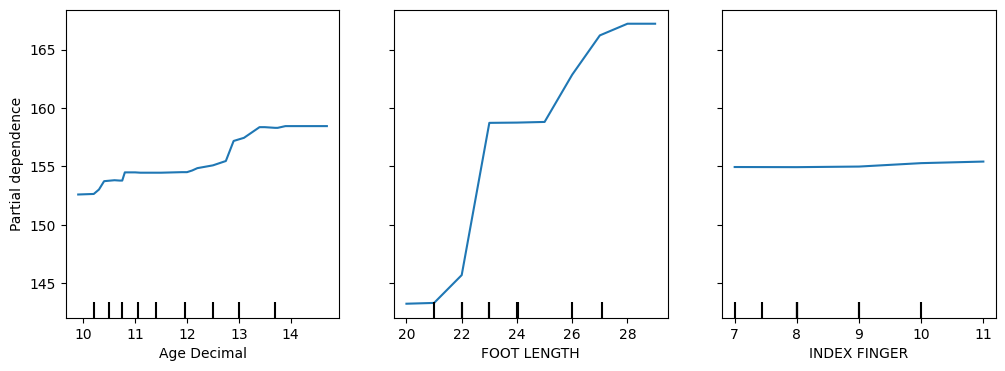

In [34]:
# now let's visualize each variable's affect on height
# Does INDEX FINGER affect anything?
fig, ax = plt.subplots(figsize=(12, 4)) # this allows us to plot all 3 together
PartialDependenceDisplay.from_estimator(model_rf, X_train, features=inputs, ax=ax)
plt.show()

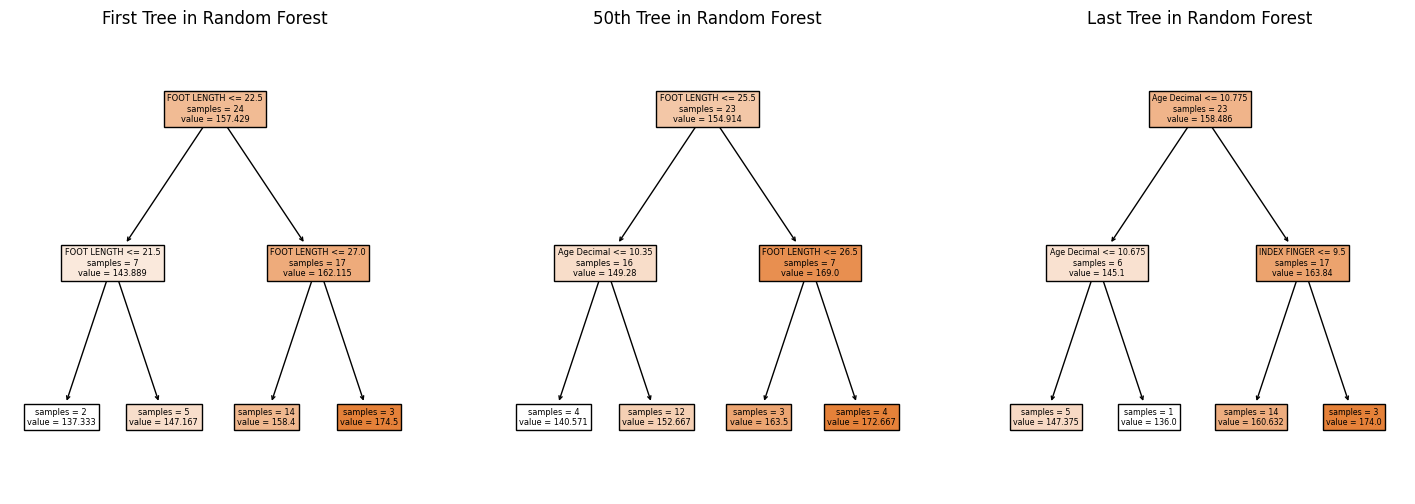

In [35]:
# Visualizing the trees
tree_rf1 = model_rf.estimators_[0]  # Change the index to view different trees
tree_rf2 = model_rf.estimators_[49]  # Change the index to view different trees
tree_rf3 = model_rf.estimators_[99]  # Change the index to view different trees

plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plot_tree(tree_rf1, filled=True, feature_names=inputs, impurity=False)
plt.title('First Tree in Random Forest')

plt.subplot(1, 3, 2)
plot_tree(tree_rf2, filled=True, feature_names=inputs, impurity=False)
plt.title('50th Tree in Random Forest')

plt.subplot(1, 3, 3)
plot_tree(tree_rf3, filled=True, feature_names=inputs, impurity=False)
plt.title('Last Tree in Random Forest')
plt.show()

## Evaluating Models
If we were predicting a discrete variable, we can use <b>accuracy</b>. Accuracy is the percent of time the prediction is correct.  
But we are predicting a continuous variable. So instead we can look at the average our prediction is off by.  
This is called Mean Absolute Error (MAE).  

In [36]:
# testing our model's predictions with the test data
predictions_linear = model_linear.predict(X_test).round()
errors_linear = np.abs(y_test - predictions_linear).round()

# comparing predictions to actual heights
pd.DataFrame({'True Height': y_test, 'Prediction': predictions_linear, 'Error': errors_linear})

,True Height,Prediction,Error
3,152,153.0,1.0
2,173,172.0,1.0
30,154,154.0,0.0
21,150,161.0,11.0
22,155,153.0,2.0
41,148,149.0,1.0
19,147,147.0,0.0
35,140,139.0,1.0
34,140,143.0,3.0


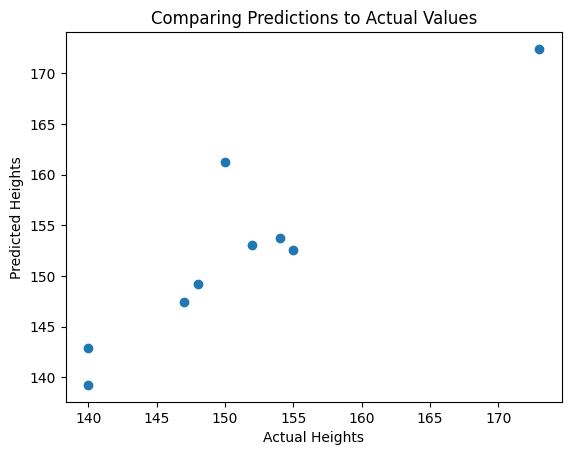

In [41]:
plt.scatter(y_test, predictions_linear)
plt.title('Comparing Predictions to Actual Values')
plt.xlabel('Actual Heights')
plt.ylabel('Predicted Heights')
plt.show()

In [37]:
# now let's calculate the error for each model and compare all three

from sklearn.metrics import mean_absolute_error

predictions_linear = model_linear.predict(X_test)
predictions_dt = model_dt.predict(X_test)
predictions_rf = model_rf.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, predictions_linear).round(1)
mae_dt = mean_absolute_error(y_test, predictions_dt).round(1)
mae_rf = mean_absolute_error(y_test, predictions_rf).round(1)

names_list = ['Linear', 'Decision Tree', 'Random Forest']
error_list = [mae_linear, mae_dt, mae_rf]

pd.DataFrame({'Model': names_list, 'Error': error_list})

,Model,Error
0,Linear,2.3
1,Decision Tree,3.1
2,Random Forest,2.4
